# Linear Regression CheatSheet

# Step one - Import the libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
# Importing the function to split the data into training and testing sets.

from sklearn.linear_model import LinearRegression
# Importing the LinearRegression class for creating a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
# Importing metrics for evaluating the model's performance using mean squared error and mean absolute error.

#  Step two - load the data

In [12]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Step three - explore

In [13]:
df.shape

(244, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [17]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [19]:
df.duplicated().sum()

1

# Step four - Look for correlations

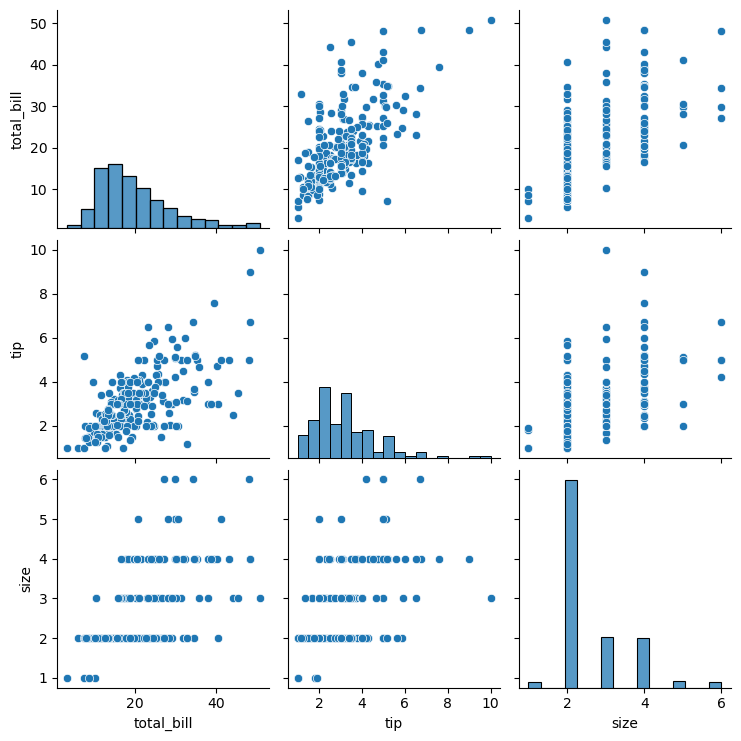

In [20]:
sns.pairplot(df)

C:\Users\geeso\AppData\Local\Temp\ipykernel_36832\1368533763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

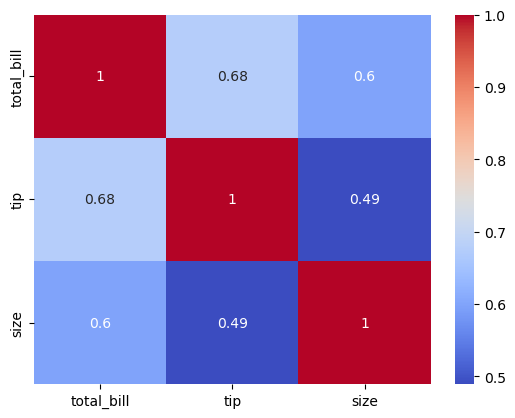

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

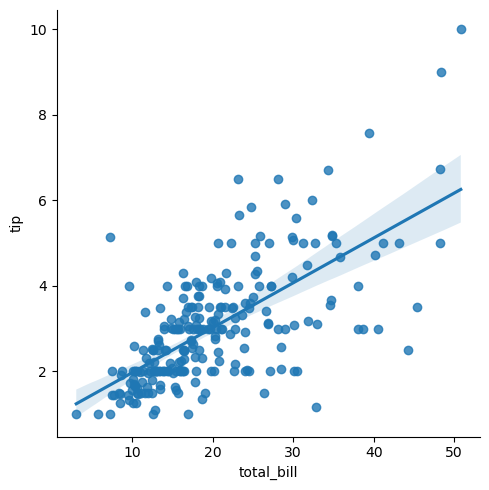

In [43]:
 # I can see a good positive correlation between total bill and tip, so we will use this for our model
    
sns.lmplot(data=df,x='total_bill',y='tip')

# Step 5 - split your data into features (X) and targets (y):

In [24]:
x = df[['total_bill']]
y = df['tip']

# So here we are exploring the influence of total bill on tip!

# If your dataset has multiple features, you can include them in X accordingly e.g., x = df[['total_bill', 'size']]

In [26]:
# Divide your data into training and testing sets to evaluate your model's performance:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.


The reason for splitting the data is to ensure that the model's performance is evaluated on unseen data. If you train and test a model on the same dataset, it might perform well on the training data but might not generalise well to new, unseen data.

The code uses the train_test_split function provided by sklearn. This function takes the input features (x) and target labels (y) as its arguments. It also takes additional parameters to determine how the split should be performed.

Parameters:

test_size: This parameter determines the proportion of the data that will be allocated for testing. In your example, test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.

random_state: This parameter is used to ensure reproducibility. Setting it to a specific value (like 42 in your example) ensures that the same split is obtained each time the code is run.

# Step 6 - create a LinearRegression model and train it using your training data:

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
# this is fitting to the x and y training data from the split

LinearRegression()

In [36]:
# Use the trained model to make predictions on the test data:
y_pred = model.predict(X_test)

# The model is done!
# Step 7 - Evaluate its performance

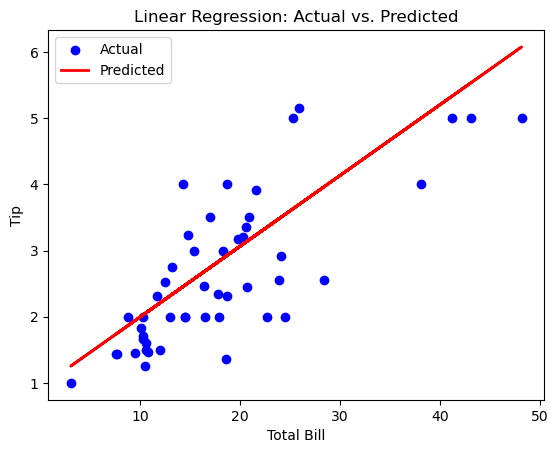

In [42]:
# Plot your actual vs. predicted values to visually assess the model's performance:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Actual vs. Predicted")
plt.legend()

In [63]:
# Create a DataFrame to compare predicted and actual tip values
comparison_df = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip': y_pred})

# Print the comparison DataFrame
comparison_df.head(10)

,Actual Tip,Predicted Tip
24,3.18,3.045256
6,2.00,1.863307
153,2.00,3.551195
211,5.16,3.694526
198,2.00,2.315764
176,2.00,2.838816
192,2.56,3.967283
124,2.52,2.260143
9,3.23,2.506159
101,3.00,2.570337


In [37]:
# Interpret the Model:

coef = model.coef_
intercept = model.intercept_

print("Coefficients:", coef)
print("Intercept:", intercept)


Coefficients: [0.10696371]
Intercept: 0.9252355585570546


coefficients indicate how much each feature influences the model's prediction. A positive coefficient suggests that as the feature increases, the target variable tends to increase as well, while a negative coefficient indicates the opposite.
The magnitude of the coefficient indicates the strength of the influence of that particular feature on the model's prediction. Larger magnitudes imply stronger influence.

Intercept: The intercept is the value of the predicted target variable when all features are at their lowest or nonexistent values. It represents the baseline prediction made by the model when no features are present.
For example: If the intercept is 2.0, it means that when all features are zero, the model predicts a target value of 2.0.

### Intrepreting the above Coeffcients, demonstrates to me that: "Holding all other features fixed, a 1 unit increase in the total bill is associated with an increase of approximately 0.10696371 total dollars spent on tips."

In [38]:
# Calculate Mean Squared Error, Mean Absolute Error, and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5688142529229538
Mean Absolute Error: 0.6208580000398983
Root Mean Squared Error: 0.7541977545199626


**Mean Squared Error (MSE):** MSE measures the average squared difference between the actual and predicted values. It gives more weight to larger errors. A lower MSE indicates a better model fit.

**Mean Absolute Error (MAE):** MAE calculates the average absolute difference between the actual and predicted values. It treats all errors equally and is less sensitive to outliers compared to MSE.

**Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE. It represents the typical magnitude of errors in the model's predictions. Like MSE, a lower RMSE indicates a better model fit.

Text(0, 0.5, 'Frequency')

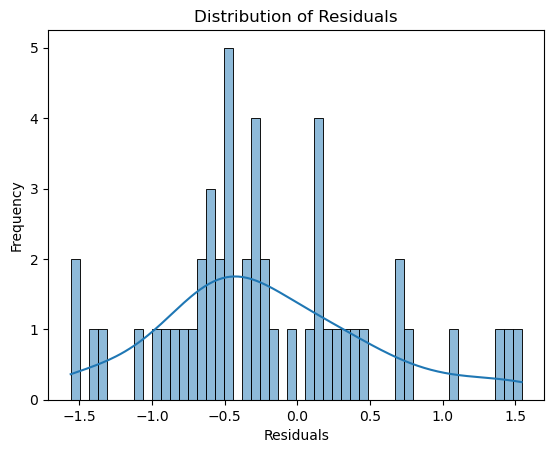

In [39]:
# Residual Analysis
# Residuals are the differences between the actual target values and the predicted values.
# If the residuals are normally distributed, it suggests that the model is capturing the underlying relationships
# between the features and the target variable correctly.

# Calculate the residuals (difference between y_test and predictions)
residuals = y_test - y_pred

# Create a histogram plot of residuals with KDE
sns.histplot(residuals, bins=50, kde=True)

# Set the title and labels for the plot
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [40]:
# Additional Information: R-squared
# R-squared measures the proportion of the variance in the target variable that's predictable from the feature(s)
# (0 to 1): Proportion of target's variability explained by the model's features.
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: 0.5449381659234663


# Finally, now the model is built and evaluated, Step 8 - Make a prediction!

In [46]:
# Choose a new total_bill value you want to predict the tip for
new_total_bill = 25  # Change this to the desired value for prediction

# Create a new data point with the chosen total_bill value
new_data_point = [[new_total_bill]]

# Use the trained model to predict the tip for the new data point
predicted_tip = model.predict(new_data_point)

# Print the predicted tip for the new data point
print("Predicted Tip for new data point:", predicted_tip)

Predicted Tip for new data point: [3.59932823]


C:\Users\geeso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
#To make predictions using your trained linear regression model, you can follow these steps. 
#Let's assume you want to predict how much the total bill would have to be in order to receive a tip of 15 dollars:

In [65]:
# Define the target tip value for prediction
target_tip = 15

# Create a new data point with the target tip value
new_data_point = [[target_tip]]

# Use the trained model to predict the total bill for the target tip
predicted_total_bill = model.predict(new_data_point)

# Print the predicted total bill for the given target tip
print("Predicted Total Bill for a Tip of $15:", predicted_total_bill[0])


Predicted Total Bill for a Tip of $15: 2.5296911613473547


C:\Users\geeso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
